# Regression modeling in R - a first pass

The following dataset contains observational measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

In [ ]:
library(testthat)

In [ ]:
library(ggplot2)

marketing = read.table(url("https://raw.githubusercontent.com/bzaharatos/-Statistical-Modeling-for-Data-Science-Applications/master/Modern%20Regression%20Analysis%20/Datasets/marketing.txt"), sep = "")

head(marketing)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


## Exploratory data analysis

Before we model the data, let's first explore the data. We'll first check to see whether there are any missing values in the dataset. Then, we'll take a look at some univariate and bivariate summaries of the data.

*Note that, in an earlier lesson, we discussed the importance of randomly partitioning the data, and using one subset of the data for exploratory data analysis, another for fitting the model, and then possibly a third for model validation. However, for this dataset, there are only $n = 200$ units in the sample, and so there is not enough data for three robust subsets. So, we'll proceed to perform EDA on the entire dataset, but noting that our conclusions may be less certain because of the possibility of error due to "double dipping".*

### Missing data and univariate explorations

Are there any missing values coded as `NA`? Or, are there any odd values for variables, e.g., `9999` or `0` possibly standing in for a missing value?

In [ ]:
#YOUR CODE HERE
#fail() # No Answer - remove if you provide an answer
dim(marketing)
cat("There are", sum(is.na(marketing)), "missing data values.")
summary(marketing)

marketing$facebook[order(marketing$facebook)[1:5]]

[1] 200   4

There are 0 missing data values.

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

[1] 0.00 0.36 0.48 0.96 1.56

YOUR ANSWER HERE

Construct a histogram of each of the variables and comment on their distributions.

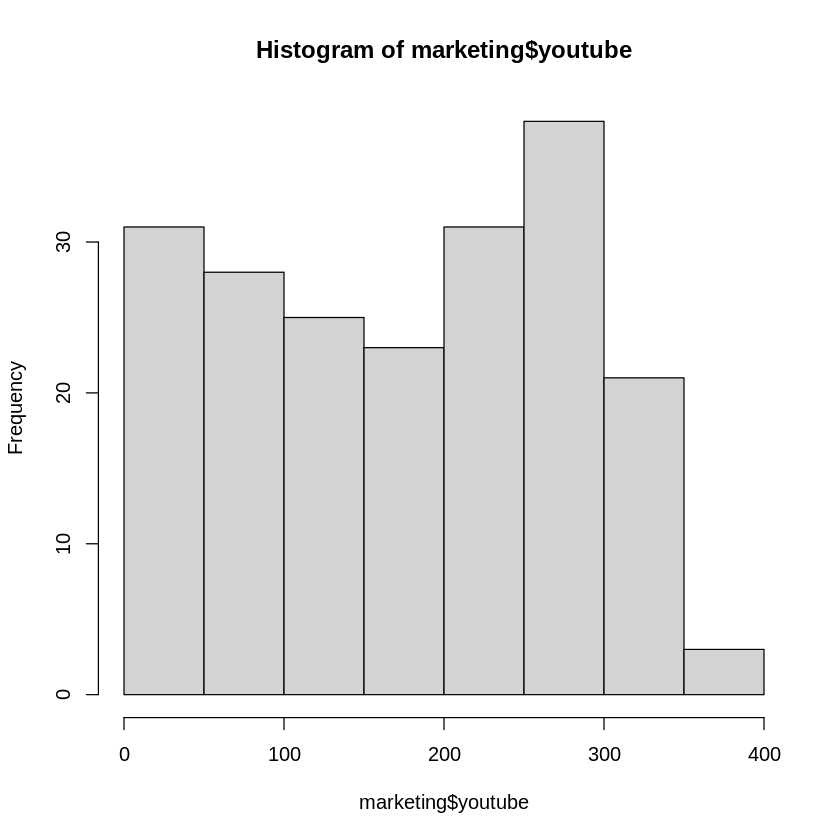

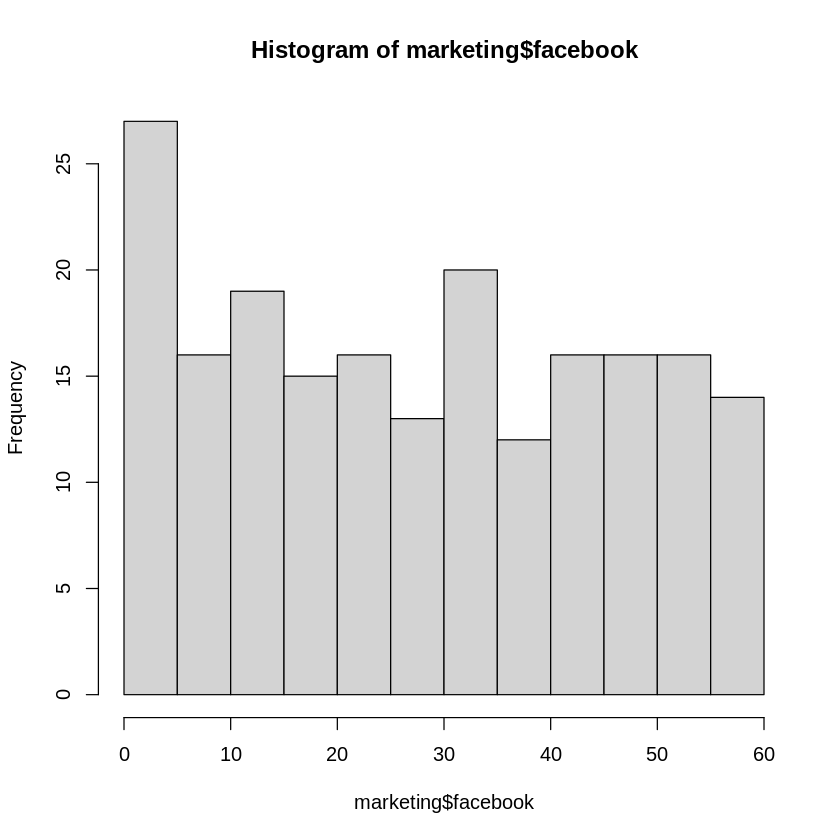

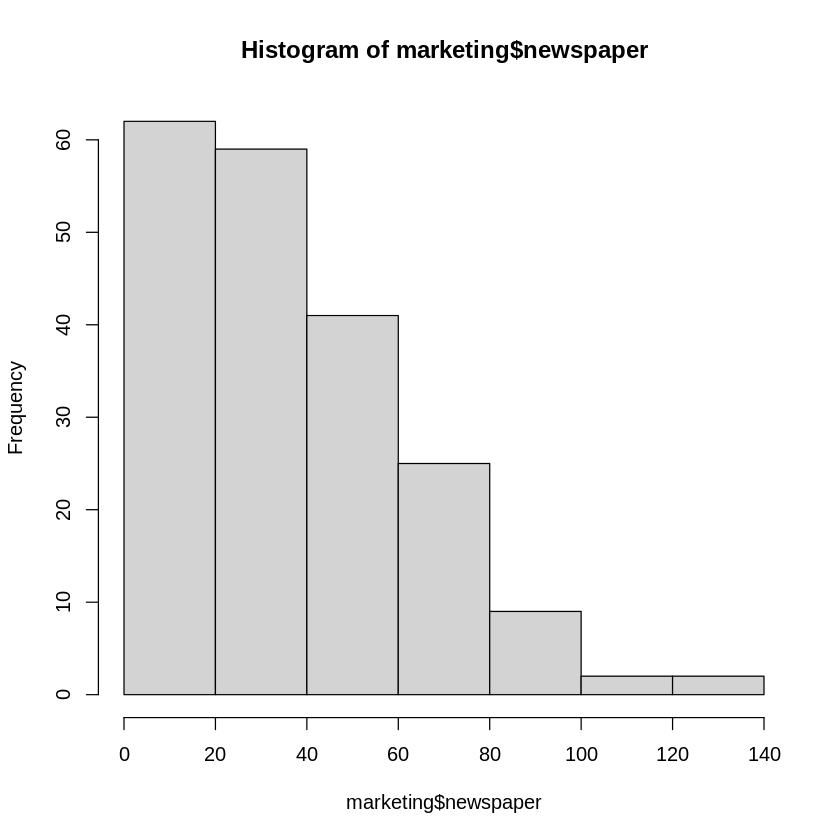

In [ ]:
#YOUR CODE HERE
#fail() # No Answer - remove if you provide an answer
#?
hist(marketing$youtube)
hist(marketing$facebook)
hist(marketing$newspaper)

YOUR ANSWER HERE

As you may have noticed from the histogram of `newspaper`, there may be a few outliers. Let's look at some boxplots to see in further detail. Note that R classifies potential outliers by the "IQR criterion". This criterion means that all observations above $q_{0.75}+1.5\times IQR$ or below $q_{0.25}-1.5\times IQR$ are classified as outliers, where

- $q_{0.25}$ is the first quartile;
- $q_{0.75}$ is the third quartile.
- IQR is the interquartile range, defined as the difference between the third and first quartile.

A boxplot will "flag" the outliers. Construct a boxplot for each variable and comment on the existence of potential outliers.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE

### Bivariate explorations
Let's now explore how the variables may or may not relate to each other. First, calculate the correlations between variables. Correlations can help us meaasure the strength of the linear relationship between variables. The bland way to do this is with to `cor()` function. But try the `corrplot()` function in the `corrplot` library (which you'll need to install in your R environment in Anaconda). Comment on the correlations.

In [ ]:
library(corrplot)
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE

However, knowing correlations alone isn't enough; the correlation coefficient can be misleading if there are nonlinear relationships, and so we should explore the relationships further.

To do so, we'll look at pairwise scatter plots, i.e., a scatter plot of each variable with each other variable. We should be looking for:

- Relationships between the response and each predictor.
- Relationships between predictor variables. Such relationships are undesirable.

Create all possible pairwise scatter plots of the data (the `pairs()` function may help). Comment on the observed relationships.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE

## Linear regression modeling

First, let's randomly split the data into a "training set" and "testing set". We do this so that we can train/fit the linear model on the training set, and then, if necessary, see how well the model fits (e.g., does it make reasonable predictions?) in the testing set. In this lesson, we will only briefly look at fit metrics on the testing set; but, it's good practice to split the data in this (or a similar) way when wanting to assess the fit or predictive power of the model.

Write code to randomly select $80\%$ of the rows from the `marketing` dataframe. Store these rows in a dataframe `train`. Then, store the remaining rows in a dataframe called `test`.

In [ ]:
set.seed(11) #set the random number generator seed.
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

### The `lm()` function

`R` has a great function for fitting and summarizing linear regression models: the `lm()` function. `lm()` will fit a linear regression model to data using least squares (or other methods, when specified), and provide many summary statistics. Let's look at some basics of `lm()`. As we progress through the course, we'll learn to work with more and more of the output of the `lm()` function.

The `lm()` function may take in several arguments, but only a small number of them are required. The first required argument is the `formula`: it should be in the following format: `response ~ predictor1 + predictor2 + ... + predictorP`. If your data are stored in a dataframe (which will often be the case), then the simplest thing to do is specify a second argument, namely `data = NameOfDataFrame`. Let's use `lm()` on the training subset of the marketing data, with just `facebook` as a predictor. **Be sure to use the training data (not the entire marketing data). Store your `lm()` object in the variable `lm_marketing`.**

After you've fit the model using `lm()`, clearly write out the fitted model and interpret the parameter estimates.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE

#### Computing regression quantities "by hand"

Let's connect the `lm()` function output to the computations that we learned about in class. First, let's construct the "design matrix", $X$, i.e., the matrix with a column of `1's`, and then columns for each predictor.

In [ ]:
X = cbind(1, train$facebook)

#another way to do this:
#X1 = model.matrix(lm_marketing)
#sum(X-X1)

Recall that the least squares solution is: $\boldsymbol{\widehat\beta} = \left(X^TX \right)^{-1}X^T\mathbf{y}$. To compute this "by hand" in `R`, we'll need the transpose function, `t()`, the operator for matrix multiplication, `%*%`, and the function for finding the inverse of a matrix, `solve()`. Use these functions to compute the least squares solution without using the `lm()` function. Store your result in the variable `b`, which should end up being a column vector. *Be sure to use the training set for this answer. `b` should match the estimate column from `lm()`.*

(Imoprtantly, this is *not* how `lm()` in `R` (or other software packates, like `Python`) actually computes the least squares estimates. Instead, they use methods that are less computationally expensive. We are computing the least squares estimates in this way to show that the theory from class matches the values from `R`. The theory will be important for our understanding and interpretation of linear regression.)

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

Now compute the fitted values and residuals of the model. Store them in the variables `yhat` and `r`, respectively.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

## Visualizing the regression model

We will learn a few important visualizations of the linear regression model in the modules to come. For now, let's just visualize our data with the regression model imposed on it.

Construct a scatter plot of `sales` ($y$) against `facebook` ($x$) *from the training data*, and plot the fitted line over the data. You can use "base R" functions like `plot()` and `abline()`, or be fancy and use `ggplot()`!


In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

Note that the fit looks OK, but that there is a lot of variability in `sales`, especially for higher values of `facebook`. Imagine making a prediction for `sales` for `facebook = 60`:

In [ ]:
yhat_60 = as.numeric(round(coef(lm_marketing)[1] + coef(lm_marketing)[2]*60, 2))

The model predicts `sales = 22.9`: that is, the model predicts that a company with a facebook marketing budget of $\$60,000$ will sell $22,900$ units of product $P$, on average. But look at other measurements near $\$60,000$; based on the data, sales could be as low as $9,000$ units or over $30,000$ units.

Finally, let's take a look at how the plot would look using the testing data instead of the training data. Ideally, we would want the the model to fit well for the testing data too.

Construct a scatter plot of `sales` ($y$) against `facebook` ($x$) *from the test data* and plot the fitted line over the data. You can use "base R" functions like `plot()` and `abline()`, or be fancy and use `ggplot()`!

Note that overlaying the regression line on a scatterplot of the data is not a rigorous way of assessing the fit of the model; later on in the course, we will learn better goodness of fit metrics for linear regression.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer